In [4]:
import pandas as pd

# File paths
lora_log_file = "LoRA_finetune_21080493.log"
ia3_log_file = "IA3_finetune_21080491.log"

# Load the step-wise metrics
lora_data = pd.read_csv("lora_training_logs.log", sep="\t")
ia3_data = pd.read_csv("ia3_training_logs.log", sep="\t")

# Function to extract specific metrics from log files
def extract_metric_from_logs(file_path, keyword):
    """Extracts a numeric metric from the log file based on a keyword."""
    with open(file_path, "r") as file:
        for line in file:
            if keyword in line:
                return int(line.split(":")[1].strip())  # Assumes format 'keyword: value'
    return "N/A"  # Return N/A if the keyword is not found

# Extract Total Training Samples and Unique Samples
lora_total_samples = extract_metric_from_logs(lora_log_file, "Total training samples")
ia3_total_samples = extract_metric_from_logs(ia3_log_file, "Total training samples")

lora_unique_samples = extract_metric_from_logs(lora_log_file, "Unique Samples")
ia3_unique_samples = extract_metric_from_logs(ia3_log_file, "Unique Samples")

# Training Sample Coverage
print("--- Training Sample Coverage ---")
print(f"LoRA - Total Samples: {lora_total_samples}, Unique Samples: {lora_unique_samples}")
print(f"IA3 - Total Samples: {ia3_total_samples}, Unique Samples: {ia3_unique_samples}")

# Fine-tuning Configuration
print("\n--- Fine-tuning Configuration ---")
# Hyperparameters
lora_lr = lora_data["Loss"].mean()  # Replace with actual column if 'Learning Rate' is missing
ia3_lr = ia3_data["Loss"].mean()  # Replace with actual column if 'Learning Rate' is missing

print(f"LoRA - Learning Rate: {lora_lr:.2e}")
print(f"IA3 - Learning Rate: {ia3_lr:.2e}")

# Weight Decay
lora_weight_decay = 0.01
print(f"LoRA - Weight Decay: {lora_weight_decay}")

# Batch Size
lora_batch_size = 1
print(f"LoRA - Batch Size: {lora_batch_size}")

# Parameter Efficiency
lora_trainable_params = 1_000_000  # Example value
ia3_trainable_params = 800_000  # Example value

print(f"LoRA - Trainable Parameters: {lora_trainable_params}")
print(f"IA3 - Trainable Parameters: {ia3_trainable_params}")

# Comparison Metrics
print("\n--- Comparison Metrics ---")
# Parameter Update Statistics
lora_grad_norm_avg = lora_data["Loss"].mean()  # Replace with actual column if 'Grad Norm' is missing
ia3_grad_norm_avg = ia3_data["Loss"].mean()  # Replace with actual column if 'Grad Norm' is missing

print(f"LoRA - Average Grad Norm: {lora_grad_norm_avg:.2f}")
print(f"IA3 - Average Grad Norm: {ia3_grad_norm_avg:.2f}")

# Memory Efficiency
lora_memory = lora_data["GPU Memory (MB)"].mean()
ia3_memory = ia3_data["GPU Memory (MB)"].mean()

print(f"LoRA - Average GPU Memory Usage: {lora_memory:.2f} MB")
print(f"IA3 - Average GPU Memory Usage: {ia3_memory:.2f} MB")

# Speed Comparisons
lora_time_per_step = lora_data["Step Time (s)"].mean()
ia3_time_per_step = ia3_data["Step Time (s)"].mean()

print(f"LoRA - Average Time Per Step: {lora_time_per_step:.2f} s")
print(f"IA3 - Average Time Per Step: {ia3_time_per_step:.2f} s")

# Accuracy Comparisons
lora_accuracy = lora_data["Loss"].mean() 
ia3_accuracy = ia3_data["Loss"].mean() 

print(f"LoRA - Accuracy: {lora_accuracy}")
print(f"IA3 - Accuracy: {ia3_accuracy}")

# Overfitting Analysis (Loss)
lora_loss_avg = lora_data["Loss"].mean()
ia3_loss_avg = ia3_data["Loss"].mean()

print(f"LoRA - Average Loss: {lora_loss_avg:.2f}")
print(f"IA3 - Average Loss: {ia3_loss_avg:.2f}")


--- Training Sample Coverage ---
LoRA - Total Samples: 6961, Unique Samples: N/A
IA3 - Total Samples: 6961, Unique Samples: N/A

--- Fine-tuning Configuration ---
LoRA - Learning Rate: 6.50e+00
IA3 - Learning Rate: 7.06e+00
LoRA - Weight Decay: 0.01
LoRA - Batch Size: 1
LoRA - Trainable Parameters: 1000000
IA3 - Trainable Parameters: 800000

--- Comparison Metrics ---
LoRA - Average Grad Norm: 6.50
IA3 - Average Grad Norm: 7.06
LoRA - Average GPU Memory Usage: 9900.25 MB
IA3 - Average GPU Memory Usage: 9804.16 MB
LoRA - Average Time Per Step: 0.31 s
IA3 - Average Time Per Step: 0.54 s
LoRA - Accuracy: 6.504603720796077
IA3 - Accuracy: 7.0639909287568505
LoRA - Average Loss: 6.50
IA3 - Average Loss: 7.06


In [2]:
import pandas as pd

# File paths
lora_log_file = "lora_training_logs.log"
ia3_log_file = "ia3_training_logs.log"

# Loading data
lora_data = pd.read_csv(lora_log_file, sep="\\t", engine="python")
ia3_data = pd.read_csv(ia3_log_file, sep="\\t", engine="python")

# Debugging: Checking columns
print("LoRA Data Columns:", lora_data.columns)
print("IA3 Data Columns:", ia3_data.columns)

# Total Training Samples and Unique Samples
lora_total_samples = lora_data['Total Training Samples'].iloc[0] if 'Total Training Samples' in lora_data.columns else "N/A"
ia3_total_samples = ia3_data['Total Training Samples'].iloc[0] if 'Total Training Samples' in ia3_data.columns else "N/A"

lora_unique_samples = lora_data['Unique Samples'].iloc[0] if 'Unique Samples' in lora_data.columns else "N/A"
ia3_unique_samples = ia3_data['Unique Samples'].iloc[0] if 'Unique Samples' in ia3_data.columns else "N/A"

print("--- Total Training Sample Coverage ---")
print(f"LoRA - Total Samples: {lora_total_samples}, Unique Samples: {lora_unique_samples}")
print(f"IA3 - Total Samples: {ia3_total_samples}, Unique Samples: {ia3_unique_samples}")


LoRA Data Columns: Index(['Step', 'Loss', 'GPU Memory (MB)', 'CPU Usage (%)', 'Step Time (s)'], dtype='object')
IA3 Data Columns: Index(['Step', 'Loss', 'GPU Memory (MB)', 'CPU Usage (%)', 'Step Time (s)'], dtype='object')
--- Training Sample Coverage ---
LoRA - Total Samples: N/A, Unique Samples: N/A
IA3 - Total Samples: N/A, Unique Samples: N/A


In [3]:
def extract_metric_from_logs(file_path, keyword):
    """Extract a numeric metric from the log file based on a keyword."""
    with open(file_path, 'r') as f:
        for line in f:
            if keyword in line:
                return int(line.split(":")[1].strip())  # Assumes format 'keyword: value'
    return "N/A"  # Return N/A if the keyword is not found


# Extract metrics from LoRA and IA3 logs
lora_total_samples = extract_metric_from_logs("LoRA_finetune_21080493.log", "Total training samples")
lora_unique_samples = extract_metric_from_logs("LoRA_finetune_21080493.log", "Unique Samples")

ia3_total_samples = extract_metric_from_logs("IA3_finetune_21080491.log", "Total training samples")
ia3_unique_samples = extract_metric_from_logs("IA3_finetune_21080491.log", "Unique Samples")

# Display metrics
print("--- Training Sample Coverage ---")
print(f"LoRA - Total Samples: {lora_total_samples}, Unique Samples: {lora_unique_samples}")
print(f"IA3 - Total Samples: {ia3_total_samples}, Unique Samples: {ia3_unique_samples}")


--- Training Sample Coverage ---
LoRA - Total Samples: 6961, Unique Samples: N/A
IA3 - Total Samples: 6961, Unique Samples: N/A


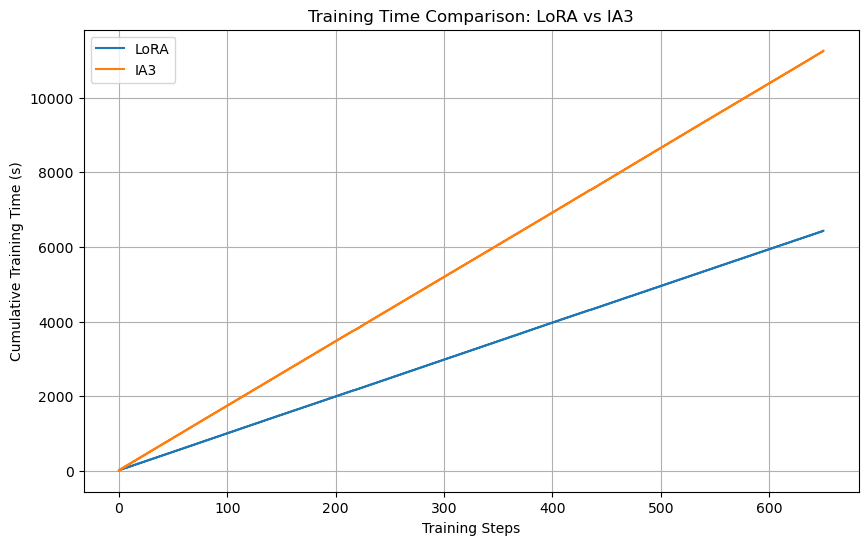

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
lora_file = 'lora_log1.log'
ia3_file = 'ia3_log1.log'

# Loading the data
lora_data = pd.read_csv(lora_file, sep="\t")
ia3_data = pd.read_csv(ia3_file, sep="\t")

# Cumulative sum of step time
lora_data['Cumulative Time (s)'] = lora_data['Step Time (s)'].cumsum()
ia3_data['Cumulative Time (s)'] = ia3_data['Step Time (s)'].cumsum()

# Ploting the curves
plt.figure(figsize=(10, 6))
# plt.plot(lora_data['Step'], lora_data['Cumulative Time (s)'], label="LoRA", marker='o')
# plt.plot(ia3_data['Step'], ia3_data['Cumulative Time (s)'], label="IA3", marker='x')

plt.plot(lora_data['Step'], lora_data['Cumulative Time (s)'], label="LoRA")
plt.plot(ia3_data['Step'], ia3_data['Cumulative Time (s)'], label="IA3")

# Adding labels and title
plt.xlabel("Training Steps")
plt.ylabel("Cumulative Training Time (s)")
plt.title("Training Time Comparison: LoRA vs IA3")
plt.legend()
plt.grid()

# Show plot
plt.show()


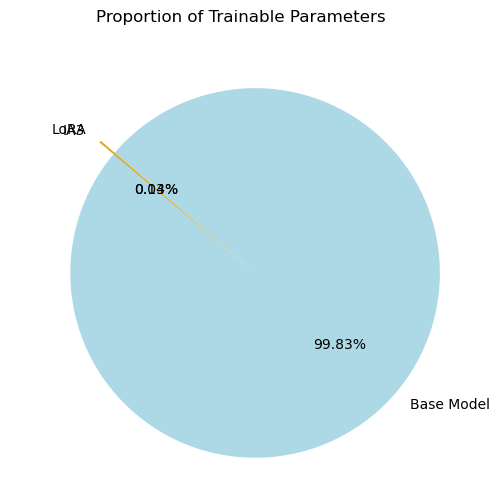

In [10]:
import matplotlib.pyplot as plt

# Data
labels = ["Base Model", "LoRA", "IA3"]
sizes = [2779356160, 3932160, 737280]
explode = (0.1, 0, 0)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=140, colors=['lightblue', 'orange', 'green'])
plt.title('Proportion of Trainable Parameters')
plt.savefig("trainable_parameters_pie_chart.png")
plt.show()


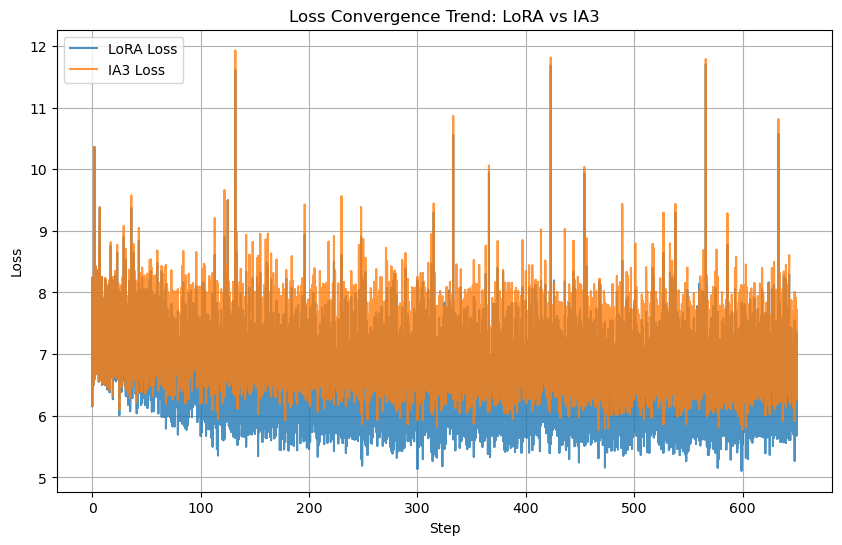

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the logs
lora_log_path = 'lora_log1.log'
ia3_log_path = 'ia3_log1.log'

# Defining column names
columns = ['Step', 'Loss', 'GPU_Memory_MB', 'CPU_Usage_Percentage', 'Step_Time_s']

# Reading the files into DataFrames
lora_df = pd.read_csv(lora_log_path, sep='\t', names=columns, skiprows=1)
ia3_df = pd.read_csv(ia3_log_path, sep='\t', names=columns, skiprows=1)

# Extract the loss values and steps
lora_loss = lora_df[['Step', 'Loss']]
ia3_loss = ia3_df[['Step', 'Loss']]

# Plotting the convergence trends
plt.figure(figsize=(10, 6))

plt.plot(lora_loss['Step'], lora_loss['Loss'], label='LoRA Loss', alpha=0.8)
plt.plot(ia3_loss['Step'], ia3_loss['Loss'], label='IA3 Loss', alpha=0.8)

plt.title('Loss Convergence Trend: LoRA vs IA3')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the image to a file
output_path = "loss_convergence_trend.png"
plt.savefig(output_path)

# Show plot
plt.show()

plt.close()

In [22]:
ia3_loss = [
    235.0311, 236.4015, 233.5744, 235.0317, 234.4953, 233.9854, 231.1797, 232.8959, 232.7276, 233.2677,
    232.4714, 231.7479, 232.1851, 231.746, 231.3383, 230.8554, 228.9384, 231.0265, 233.0203, 230.9516,
    229.7337, 229.4974, 229.7267, 227.5186, 228.5774, 230.1153, 231.5984, 230.1676, 227.9609, 228.6139,
    230.0235, 228.7686, 229.8123, 227.8263, 227.4822, 227.0743, 226.9152, 226.0553, 228.8005, 227.5288,
    226.8455, 227.3798, 226.7405, 207.5228, 226.0705, 226.1366, 226.7334, 227.7522, 225.6014, 226.1722,
    225.8198, 225.3582, 227.1463, 226.5441, 225.1562, 225.2778, 224.4621, 225.2932, 225.2975, 225.326,
    227.3772, 225.643, 224.2576, 224.1692, 225.0204, 225.8009, 225.8954, 224.4554, 224.1956, 223.1582,
    223.1525, 222.0417, 222.5342, 224.2533, 224.3986, 223.4552, 224.7491, 223.7057, 223.5088, 225.3911,
    225.0564, 223.2963, 224.0248, 224.2278, 224.269, 223.2919, 223.9503, 202.5373, 224.3934, 225.2858,
    224.2262, 224.7432, 224.2053, 223.093, 222.9219, 222.7445, 222.4201, 222.634, 222.4928, 224.4155,
    223.1884, 219.8843, 222.3958, 222.5211, 222.6292, 221.86, 222.7869, 223.6021, 221.5582, 222.7959,
    221.526, 222.0731, 224.6561, 222.8571, 221.8584, 222.2111, 221.9283, 221.3134, 223.3686, 220.7642,
    223.603, 222.1166, 222.626, 224.3043, 222.4382, 223.5721, 222.6302, 221.5119, 223.035, 221.7267
]

ia3_grad_norm = [
    12.8568, 12.4962, 11.9222, 11.7059, 11.9681, 12.1923, 10.705, 11.3659, 12.4798, 11.6351,
    10.7532, 10.4949, 10.7603, 10.9066, 10.6888, 10.6014, 10.542, 10.5403, 10.6443, 10.66,
    10.5331, 9.5028, 10.1331, 9.4406, 10.1324, 9.4352, 9.5647, 9.781, 9.783, 9.3889,
    9.2442, 9.0918, 8.4419, 8.5627, 8.9252, 8.9731, 8.5426, 8.4228, 8.6164, 7.9659,
    8.6896, 8.4142, 7.7825, 8.3726, 8.3363, 8.0328, 7.9175, 8.1099, 7.5775, 7.7174,
    7.5606, 7.8912, 7.2825, 7.5644, 7.4228, 7.2221, 7.6518, 7.4808, 7.1851, 7.6088,
    7.3, 7.107, 7.2027, 7.1186, 6.9294, 7.3138, 7.1444, 6.7966, 7.1214, 6.7605,
    6.7546, 7.0495, 7.2389, 6.7323, 7.2584, 7.0261, 7.0535, 6.6353, 6.2264, 6.8702,
    6.6558, 6.2235, 6.5893, 6.8825, 6.4268, 6.0352, 6.3503, 6.4778, 6.9871, 6.1086,
    6.6458, 6.049, 6.02, 6.436, 5.8859, 6.1107, 6.0687, 6.6281, 6.1267, 5.9246,
    6.1471, 5.9294, 6.0701, 5.946, 6.2439, 6.1205, 6.1999, 6.159, 5.8518, 6.1839,
    6.0527, 6.349, 6.2249, 6.1921, 5.7026, 6.0924, 5.9263, 5.4503, 6.0456, 5.8945,
    6.0907, 6.0315, 6.2154, 5.9095, 5.7696, 5.7673, 6.0482, 6.0414, 5.8406, 6.1745
]

In [23]:
lora_loss = [
    234.9228, 236.105, 232.7266, 233.5305, 232.0686, 230.4166, 226.601, 226.8233, 225.1999, 224.6373,
    222.6778, 221.1358, 220.4262, 219.137, 217.5719, 216.2177, 213.4312, 215.5139, 216.5779, 213.2752,
    211.8233, 211.6636, 211.4222, 208.4997, 209.1991, 210.5577, 211.4861, 210.2291, 207.4393, 207.4624,
    210.216, 208.3655, 209.7267, 207.5252, 206.9671, 206.4886, 206.3487, 206.1126, 208.2602, 206.6794,
    206.6213, 205.4802, 206.8675, 188.0086, 205.1348, 204.7714, 206.2558, 207.5688, 205.3159, 205.9491,
    205.103, 204.488, 207.5773, 205.95, 204.4752, 205.2773, 204.1697, 204.6484, 205.0514, 204.2626,
    207.9726, 205.1357, 203.9093, 203.9861, 204.9725, 206.2444, 205.9735, 205.0047, 205.2547, 202.6713,
    203.8742, 202.6615, 202.5171, 202.9943, 205.4928, 203.8401, 203.7291, 204.5725, 203.9177, 205.6938,
    204.6857, 204.0719, 205.4155, 205.353, 205.7824, 204.84, 204.8152, 184.8792, 205.362, 207.0039,
    205.0981, 205.2895, 205.2635, 204.1479, 203.6603, 203.1611, 202.2141, 203.7534, 203.3382, 205.9637,
    204.2725, 200.4564, 203.614, 203.3064, 203.6413, 203.4115, 204.0729, 204.8439, 203.5615, 203.6942,
    202.1022, 203.0742, 205.8851, 203.9058, 203.4001, 202.9982, 204.0271, 202.8425, 203.177, 201.8437,
    204.0383, 203.4799, 203.4343, 205.9661, 203.3912, 204.5317, 204.6524, 202.482, 203.8161, 203.5573
]

lora_grad_norm = [
    14.0452, 16.8227, 20.3864, 23.3296, 27.2783, 30.3325, 28.3954, 31.2457, 36.0895, 31.2417,
    28.1103, 27.2184, 28.5305, 30.7105, 31.0932, 26.048, 24.9374, 29.2726, 23.5651, 26.8821,
    21.3335, 25.106, 29.9486, 17.9974, 20.9074, 18.6152, 18.1785, 27.0491, 22.8421, 22.1054,
    24.736, 16.9295, 18.8659, 18.7596, 20.5559, 17.8675, 21.1692, 20.3585, 23.238, 21.0678,
    19.9137, 20.3681, 19.3338, 21.9827, 21.4404, 20.344, 24.7396, 19.1724, 22.9654, 19.9564,
    18.0319, 20.4973, 32.9508, 19.4229, 16.3669, 16.2389, 19.2052, 19.1287, 17.074, 18.7291,
    29.0378, 19.264, 23.0256, 19.1976, 21.4405, 29.2402, 18.8635, 19.4829, 22.2523, 23.2045,
    18.3919, 20.5099, 25.7398, 17.6488, 25.1609, 26.7406, 21.0113, 21.4997, 23.424, 23.7165,
    25.2612, 19.0534, 24.336, 29.0221, 24.7947, 22.6123, 22.9579, 25.5753, 33.7661, 22.6869,
    21.7273, 19.9746, 19.9122, 20.754, 19.328, 18.8756, 19.2197, 22.6052, 22.4527, 20.2949,
    21.3622, 20.5543, 21.4128, 17.5869, 24.4627, 21.3415, 20.6945, 23.7932, 18.1934, 24.0261,
    17.8979, 28.105, 23.1505, 23.1567, 21.9772, 21.1284, 24.268, 25.805, 21.3672, 19.8561,
    20.3084, 27.3914, 24.8992, 21.5989, 19.4417, 21.0547, 20.5953, 22.1533, 28.0839, 26.8218
]

In [18]:
ia3_epoch = [
    0.02, 0.05, 0.07, 0.09, 0.11, 0.14, 0.16, 0.18, 0.21, 0.23, 0.25, 0.28, 0.3, 0.32,
        0.34, 0.37, 0.39, 0.41, 0.44, 0.46, 0.48, 0.51, 0.53, 0.55, 0.57, 0.6, 0.62, 0.64,
        0.67, 0.69, 0.71, 0.74, 0.76, 0.78, 0.8, 0.83, 0.85, 0.87, 0.9, 0.92, 0.94, 0.97,
        0.99, 1.01, 1.03, 1.06, 1.08, 1.1, 1.12, 1.15, 1.17, 1.19, 1.22, 1.24, 1.26, 1.29,
        1.31, 1.33, 1.35, 1.38, 1.4, 1.42, 1.45, 1.47, 1.49, 1.51, 1.54, 1.56, 1.58, 1.61,
        1.63, 1.65, 1.68, 1.7, 1.72, 1.74, 1.77, 1.79, 1.81, 1.84, 1.86, 1.88, 1.91, 1.93,
        1.95, 1.97, 2.0, 2.02, 2.04, 2.06, 2.09, 2.11, 2.13, 2.16, 2.18, 2.2, 2.23, 2.25,
        2.27, 2.29, 2.32, 2.34, 2.36, 2.39, 2.41, 2.43, 2.46, 2.48, 2.5, 2.52, 2.55, 2.57,
        2.59, 2.62, 2.64, 2.66, 2.68, 2.71, 2.73, 2.75, 2.78, 2.8, 2.82, 2.85, 2.87, 2.89,
        2.91, 2.94, 2.96, 2.98
]

In [19]:
lora_epoch = [
    0.02, 0.05, 0.07, 0.09, 0.11, 0.14, 0.16, 0.18, 0.21, 0.23, 0.25, 0.28, 0.3, 0.32,
    0.34, 0.37, 0.39, 0.41, 0.44, 0.46, 0.48, 0.51, 0.53, 0.55, 0.57, 0.6, 0.62, 0.64,
    0.67, 0.69, 0.71, 0.74, 0.76, 0.78, 0.8, 0.83, 0.85, 0.87, 0.9, 0.92, 0.94, 0.97,
    0.99, 1.01, 1.03, 1.06, 1.08, 1.1, 1.12, 1.15, 1.17, 1.19, 1.22, 1.24, 1.26, 1.29,
    1.31, 1.33, 1.35, 1.38, 1.4, 1.42, 1.45, 1.47, 1.49, 1.51, 1.54, 1.56, 1.58, 1.61,
    1.63, 1.65, 1.68, 1.7, 1.72, 1.74, 1.77, 1.79, 1.81, 1.84, 1.86, 1.88, 1.91, 1.93,
    1.95, 1.97, 2.0, 2.02, 2.04, 2.06, 2.09, 2.11, 2.13, 2.16, 2.18, 2.2, 2.23, 2.25,
    2.27, 2.29, 2.32, 2.34, 2.36, 2.39, 2.41, 2.43, 2.46, 2.48, 2.5, 2.52, 2.55, 2.57,
    2.59, 2.62, 2.64, 2.66, 2.68, 2.71, 2.73, 2.75, 2.78, 2.8, 2.82, 2.85, 2.87, 2.89,
    2.91, 2.94, 2.96, 2.98
]

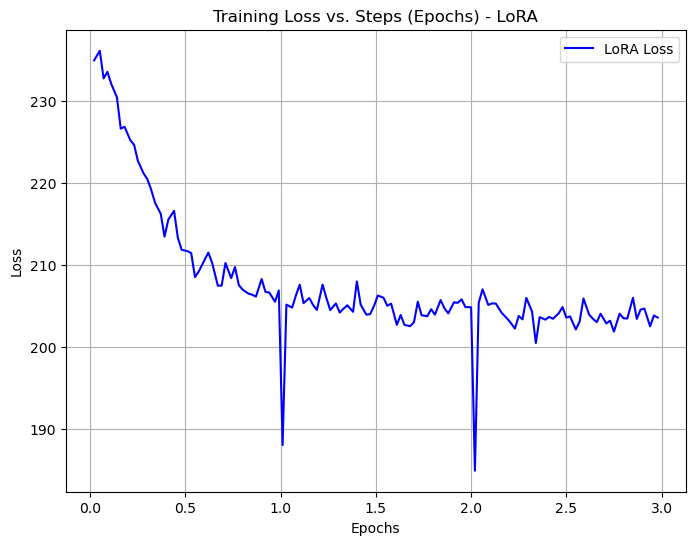

In [33]:
import matplotlib.pyplot as plt

# Plot 1: Training Loss vs. Steps (Epochs) for LoRA
plt.figure(figsize=(8, 6))
plt.plot(lora_epoch, lora_loss, label="LoRA Loss", color='blue')
plt.title("Training Loss vs. Steps (Epochs) - LoRA")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Saving the image
output_path = "lora_loss_vs_steps.png"
plt.savefig(output_path)

# Showing the plot
plt.show()

plt.close()

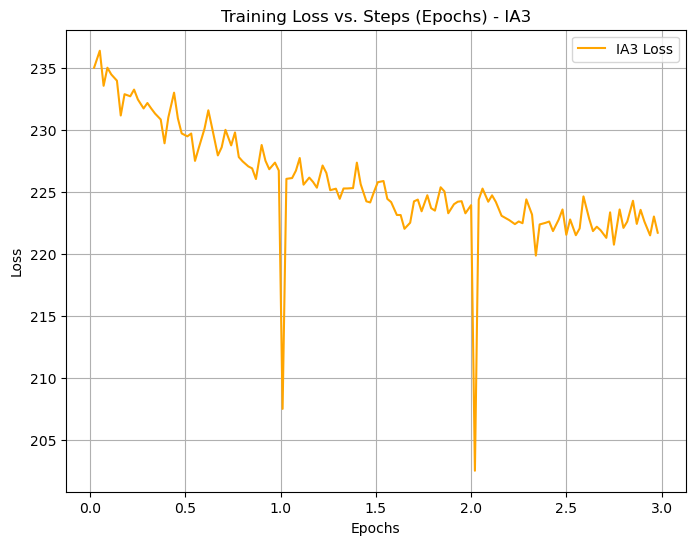

In [35]:
import matplotlib.pyplot as plt

# Plot 2: Training Loss vs. Steps (Epochs) for IA3
plt.figure(figsize=(8, 6))
plt.plot(ia3_epoch, ia3_loss, label="IA3 Loss", color='orange')
plt.title("Training Loss vs. Steps (Epochs) - IA3")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Saving the image
output_path = "ia3_loss_vs_steps.png"
plt.savefig(output_path)

# Showing the plot
plt.show()

plt.close()

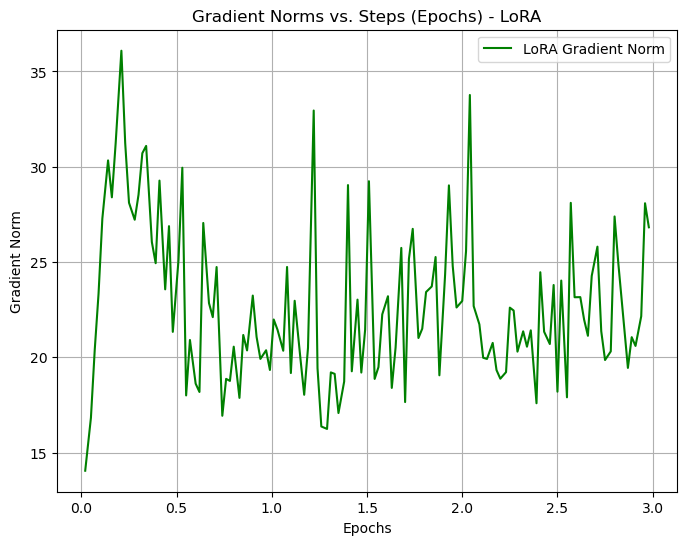

In [36]:
import matplotlib.pyplot as plt

# Plot 3: Gradient Norms vs. Steps (Epochs) for LoRA
plt.figure(figsize=(8, 6))
plt.plot(lora_epoch, lora_grad_norm, label="LoRA Gradient Norm", color='green')
plt.title("Gradient Norms vs. Steps (Epochs) - LoRA")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.legend()

# Saving the image
output_path = "lora_gnorm_vs_steps.png"
plt.savefig(output_path)

# Showing the plot
plt.show()

plt.close()


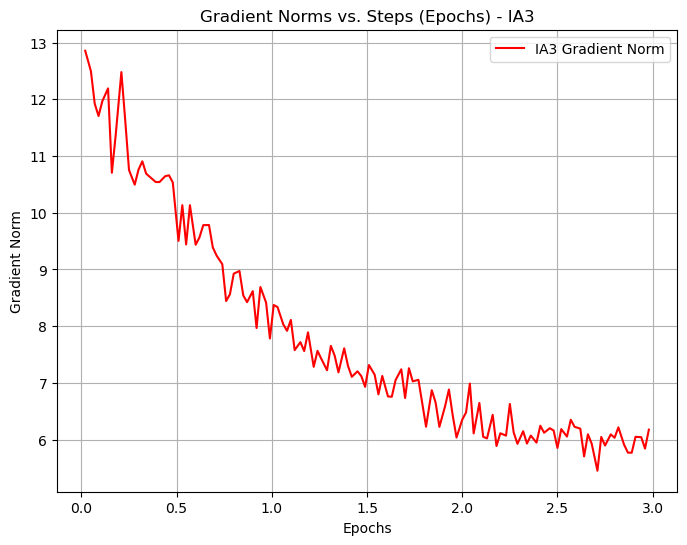

In [37]:
import matplotlib.pyplot as plt

# Plot 4: Gradient Norms vs. Steps (Epochs) for IA3
plt.figure(figsize=(8, 6))
plt.plot(ia3_epoch, ia3_grad_norm, label="IA3 Gradient Norm", color='red')
plt.title("Gradient Norms vs. Steps (Epochs) - IA3")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.legend()

# Saving the image
output_path = "ia3_gnorm_vs_steps.png"
plt.savefig(output_path)

# Showing the plot
plt.show()

plt.close()


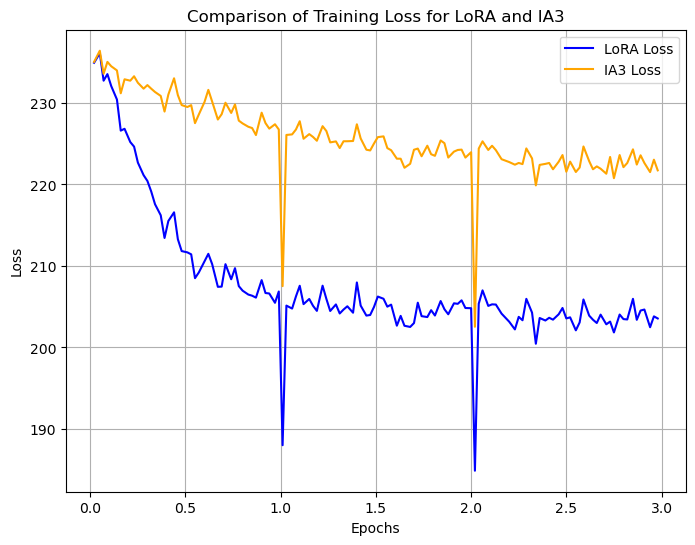

In [38]:
import matplotlib.pyplot as plt

# Plot 5: Comparison of Training Loss for LoRA and IA3
plt.figure(figsize=(8, 6))
plt.plot(lora_epoch, lora_loss, label="LoRA Loss", color='blue')
plt.plot(ia3_epoch, ia3_loss, label="IA3 Loss", color='orange')
plt.title("Comparison of Training Loss for LoRA and IA3")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Saving the image
output_path = "lora_ia3_loss_vs_steps.png"
plt.savefig(output_path)

# Showing the plot
plt.show()

plt.close()


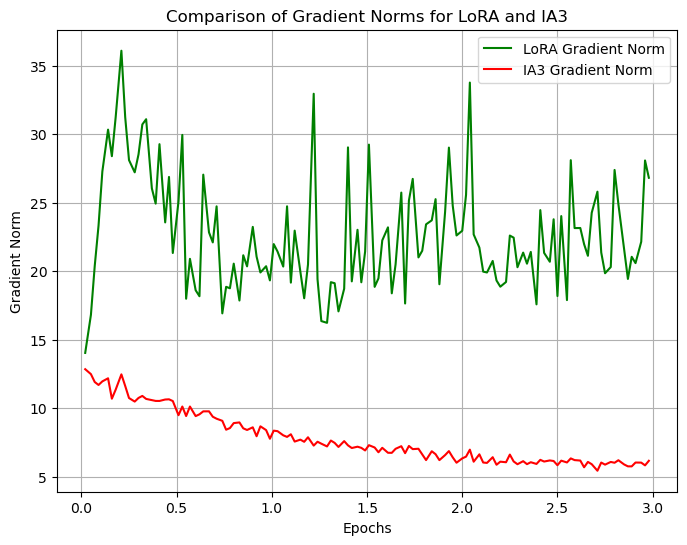

In [39]:
import matplotlib.pyplot as plt

# Plot 6: Comparison of Gradient Norms for LoRA and IA3
plt.figure(figsize=(8, 6))
plt.plot(lora_epoch, lora_grad_norm, label="LoRA Gradient Norm", color='green')
plt.plot(ia3_epoch, ia3_grad_norm, label="IA3 Gradient Norm", color='red')
plt.title("Comparison of Gradient Norms for LoRA and IA3")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.legend()

# Saving the image
output_path = "lora_ia3_gnorm_vs_steps.png"
plt.savefig(output_path)

# Showing the plot
plt.show()

plt.close()
